# Classification

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([[1,1],[1,2],[3,1],[3,2]])
y = np.array([0,0,1,1])

Info
- Instances = Rows
- Attributes or Dimentions = Columns

x & y contain
- 4 Rows
- 2 Feature

In [3]:
print(x.shape)

(4, 2)


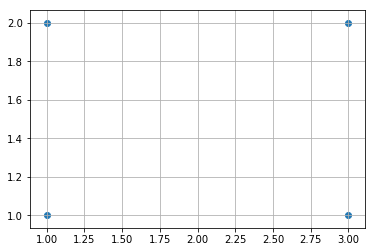

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.grid()

In [5]:
# MODEL CREATION

from sklearn.svm import LinearSVC

In [11]:
# MODEL CREATION

model = LinearSVC()

# TRAINING
model.fit(x,y)

# PREDICTION
predicted=model.predict(x)

In [7]:
# WHAT HAPPENS IN TRAINING
model = LinearSVC()
print(vars(model))
model.fit(x,y)
print(vars(model))

{'dual': True, 'tol': 0.0001, 'C': 1.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': None, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge'}
{'dual': True, 'tol': 0.0001, 'C': 1.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': None, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'classes_': array([0, 1]), 'coef_': array([[ 0.72250023, -0.38741969]]), 'intercept_': array([-0.7643818]), 'n_iter_': 74}


In [8]:
print(model.coef_)
print(model.intercept_)
print(model.classes_)

[[ 0.72250023 -0.38741969]]
[-0.7643818]
[0 1]


In [9]:
# PREDICTION

predicted = model.predict(x)
print("predicted",predicted)
print("actual",y)

predicted [0 0 1 1]
actual [0 0 1 1]


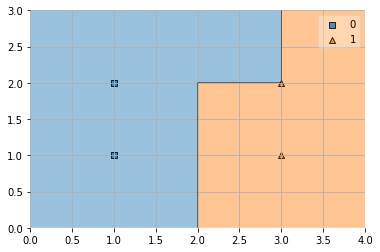

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y, clf=model)
plt.grid()

## Classification as Curve Fitting
- Extend the line and find y for corresponding x

In [48]:
model.predict([[1.5,0.5]])

array([1])

In [50]:
model.predict([[1,0.5]])

array([0])

## Accuracy of Classification

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, predicted))
print(accuracy_score(y_true=y,y_pred=predicted))

1.0
1.0


In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, predicted))
print(confusion_matrix(y_true=y,y_pred=predicted))

[[2 0]
 [0 2]]
[[2 0]
 [0 2]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted))
print(classification_report(y_true=y,y_pred=predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4



In [22]:
# Sample Data Generator

from sklearn.datasets.samples_generator import make_blobs

x,y = make_blobs(n_samples=10000, n_features=2, centers=3, cluster_std=0.5,random_state=0)

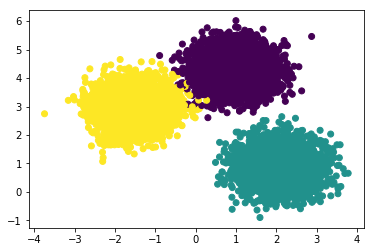

In [23]:
plt.scatter(x[:,0],x[:,1],c=y)

[[2 0 2]
 [0 3 0]
 [1 0 2]]
             precision    recall  f1-score   support

          0       0.67      0.50      0.57         4
          1       1.00      1.00      1.00         3
          2       0.50      0.67      0.57         3

avg / total       0.72      0.70      0.70        10



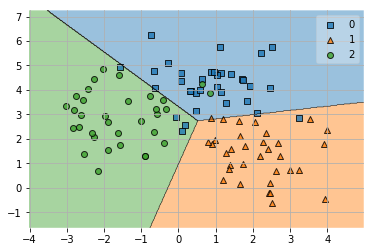

In [24]:
from sklearn.svm import LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split


x,y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=5)

model = LinearSVC()

model.fit(x_train,y_train)

predicted=model.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y, clf=model)
plt.grid()

In [7]:
from sklearn.svm import LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split


#x,y = make_blobs(n_samples=1000, n_features=10, centers=3, cluster_std=5,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=5)

model = LinearSVC()

model.fit(x_train,y_train)

predicted=model.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

[[29  0  3]
 [ 0 28  1]
 [ 0  4 35]]
             precision    recall  f1-score   support

          0       1.00      0.91      0.95        32
          1       0.88      0.97      0.92        29
          2       0.90      0.90      0.90        39

avg / total       0.92      0.92      0.92       100



In [28]:
%timeit model.fit(x_train,y_train)

2.27 ms ± 98.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


ValueError: Filler values must be provided when X has more than 2 training features.

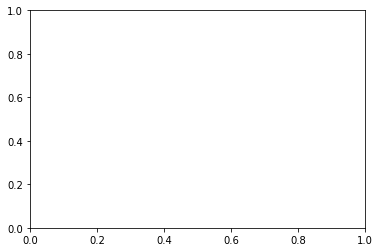

In [8]:
# Decision Boundry Function in mlxtend doesn't work for more than 2 feature... Then what can we do?
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y, clf=model)
plt.grid()

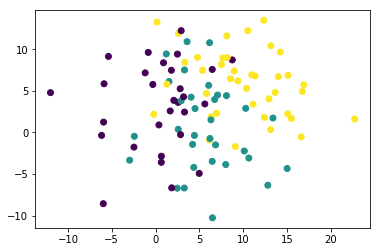

In [16]:
plt.scatter(x_test[:,0],x_test[:,1],c=predicted)

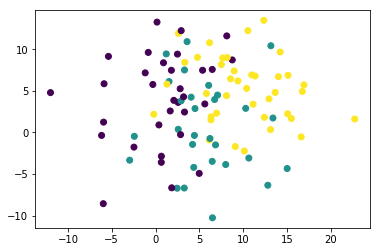

In [17]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)